I am building a LeNet-50 CNN using Keras for digit classification on grayscale images (28x28) from a dataset. The architecture includes convolutional, max pooling, and fully connected layers, using ReLU and softmax activations.

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


df_train is loaded from a CSV file, which contains the training images and corresponding labels.

X_train contains the image data, and Y_train contains the labels.

The first few rows of the data are printed for inspection.

In [ ]:
df_train = pd.read_csv('/content/Lenet_Train')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [ ]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_train.head()

,label
0,1
1,0
2,1
3,4
4,0


In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

**Data Normalization:**

X_train is converted to a NumPy array and normalized by dividing pixel values by 255 to bring them to a range between 0 and 1. This is a common preprocessing step to make the training process more efficient.

In [ ]:
# Normalize inputs
X_train = X_train / 255.0

In [ ]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()


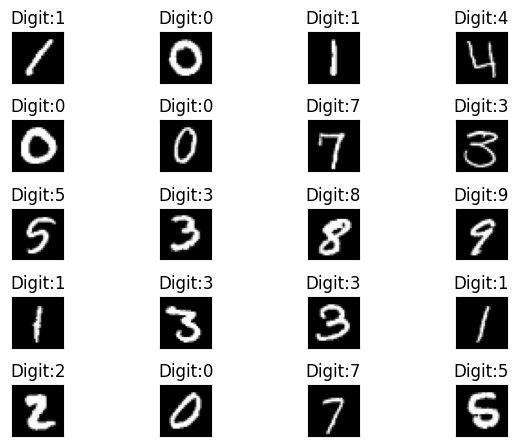

In [ ]:
plot_digits(X_train, Y_train)

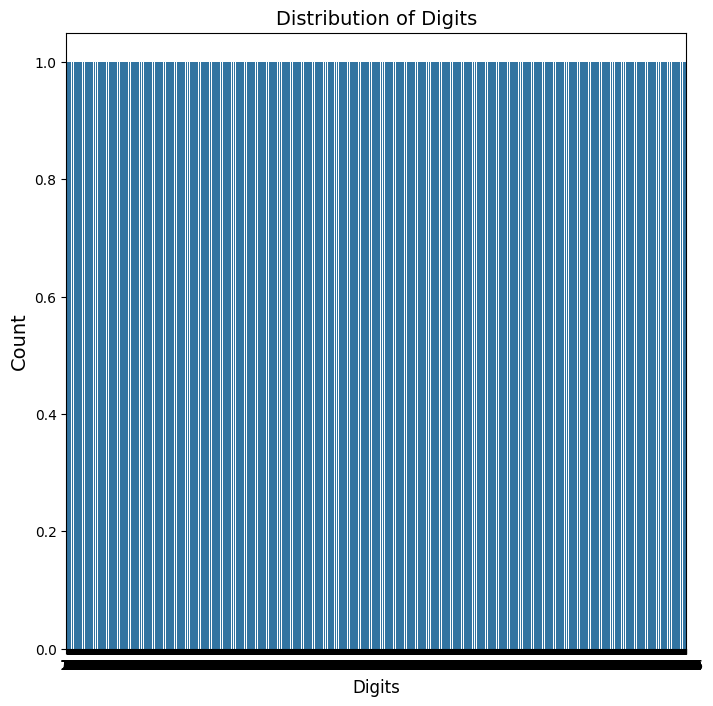

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

The dataset is split into training and validation sets using train_test_split. The X_dev and X_val sets contain the image data, while Y_dev and Y_val are the labels.


The labels are one-hot encoded using pd.get_dummies() to prepare them for the classification task.
X_dev and X_val are reshaped to 28x28x1 to fit the input shape of the CNN.


In [ ]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [ ]:
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

Model Definition (LeNet-50 Architecture):
A CNN model is built using Keras’ Sequential API:
Conv2D Layers: Extract spatial features from the input images.

First convolutional layer: 32 filters, kernel size of (5x5), ReLU activation, and 'same' padding.

Second convolutional layer: 48 filters, kernel size of (5x5), ReLU activation, and 'valid' padding.

MaxPool2D Layers: Reduce the spatial dimensions of feature maps.

Flatten: Converts the 2D feature maps into a 1D vector.

Dense Layers: Fully connected layers that learn more abstract representations.

First Dense layer with 256 units and ReLU activation.

Second Dense layer with 84 units and ReLU activation.

Final Dense layer with 10 units and softmax activation for classification (10 digits).

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.build()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Correctly set the learning rate using 'learning_rate' instead of 'lr'
adam = Adam(learning_rate=5e-4)

In [ ]:
# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                              patience=3,
                              verbose=1,
                              factor=0.5,
                              min_lr=1e-6)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)
datagen.fit(X_dev)


In [ ]:
# Assuming 'datagen' is an instance of ImageDataGenerator
history = model.fit(datagen.flow(X_dev, T_dev, batch_size=100),
                    steps_per_epoch=len(X_dev) // 100,
                    epochs=100,
                    validation_data=(X_val, T_val),
                    callbacks=[reduce_lr])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.2937 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0800 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.0988 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1100 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.1016 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1400 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.1017 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0700 - loss: nan - val_accuracy: 0.0962 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.0963 - loss: nan - val_accuracy: 0.0962 - val

In [ ]:
score = model.evaluate(X_val, T_val, batch_size=32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0822 - loss: nan


In [ ]:
score

[nan, 0.09615384787321091]

In [ ]:
df_test = pd.read_csv('/content/Lenet_Train.csv')
X_test = np.array(df_test)
print(X_test.shape)

(42000, 785)


In [ ]:
# Load test data (modify the path as per your test data location)
df_test = pd.read_csv('/content/Lenet_Test.csv')
X_test = np.array(df_test)

# Normalize the test data
X_test = X_test / 255.0  # This assumes the model was trained with normalized data

# Reshape the test data to match input shape of the model (28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  # Make sure the reshaping is correct

# Make predictions
predictions = model.predict(X_test)

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)



875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step


#LENET50

The necessary libraries are imported for PyTorch (though not used in this version) and Keras.

The MNIST dataset is loaded using mnist.load_data() from Keras, which is a built-in dataset for handwritten digits (28x28 grayscale images).

In [ ]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

The training and testing images (X_train, X_test) are reshaped to include an additional channel for grayscale (28x28x1) and normalized by dividing by 255.0 to scale pixel values between 0 and 1.

The labels (Y_train, Y_test) are one-hot encoded using to_categorical(), converting them into a 10-dimensional binary vector for classification.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Input Layer: The input shape is defined as (28, 28, 1) for grayscale images.

Conv2D Layers: The model has three convolutional layers with ReLU activation and different numbers of filters (6 and 16).

First two convolutional layers are followed by average pooling layers to reduce the spatial dimensions of the feature maps.

The third convolutional layer is directly followed by flattening.

Dense Layers: After flattening, two fully connected (Dense) layers are used:

The first dense layer has 120 neurons with ReLU activation.

The second dense layer has 84 neurons with softmax activation, which outputs probabilities for 10 digit classes (0-9).

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from keras.optimizers import Adam

# Define the modified model
model = Sequential([
    Input(shape=(28, 28, 1)),

    # First Convolutional Layer
    Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),

    # Flatten the output for the Fully Connected Layers
    Flatten(),

    # First Fully Connected Layer
    Dense(120, activation='relu'),

    # Second Fully Connected Layer
    Dense(84, activation='softmax')
])

# Compile the modified model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 7, 7, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 16)            │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 84)                  │          10,164 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,352 (442.78 KB)

 Trainable params: 113,352 (442.78 KB)

 Non-trainable params: 0 (0.00 B)

Input (28, 28, 1) --->
Conv2D (filters=6, kernel_size=(5, 5), padding='same', activation='relu')--->
AveragePooling2D (pool_size=(2, 2))--->
Conv2D (filters=16, kernel_size=(5, 5), padding='same', activation='relu')---->
AveragePooling2D (pool_size=(2, 2)) ---->
Conv2D (filters=16, kernel_size=(5, 5), padding='same', activation='relu')---->
Flatten----->
Dense (units=120, activation='relu')----->
Dense (units=84, activation='softmax')


The model is compiled using the Adam optimizer with a learning rate of 0.001.

The loss function is categorical cross-entropy, suitable for multi-class classification problems.
Accuracy is used as the evaluation metric.

The model is trained on the training data (X_train, Y_train) with a batch size of 128 for 10 epochs.

20% of the data is reserved for validation during training (validation_split=0.2).

verbose=1 allows you to see detailed output during training.

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 193ms/step - accuracy: 0.8434 - loss: 0.5122 - val_accuracy: 0.9781 - val_loss: 0.0738
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 171ms/step - accuracy: 0.9808 - loss: 0.0611 - val_accuracy: 0.9847 - val_loss: 0.0556
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9887 - val_loss: 0.0398
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9887 - val_loss: 0.0369
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 175ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9865 - val_loss: 0.0458
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - accuracy: 0.9950 - loss: 0.0162 - val_accuracy: 0.9901 - val_loss: 0.0325
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9877 - val_loss: 0.0432
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 167ms/step - accuracy: 0.9964 - loss: 0

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9873 - loss: 0.0380
Test Loss: 0.030980819836258888
Test Accuracy: 0.9902999997138977


In [ ]:
# Make predictions
Y_pred = model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)

# Create submission file
import pandas as pd

df_out = pd.DataFrame({'ImageId': range(1, len(Y_pred) + 1), 'Label': Y_pred})
df_out.to_csv('submission.csv', index=False)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
import pandas as pd

# Assuming Y_pred is the list or array of predictions
df_out = pd.DataFrame({'ImageId': range(1, len(Y_pred) + 1), 'Label': Y_pred})

# Save to CSV file
df_out.to_csv('submission.csv', index=False)

# Print the contents of the submission file
print(df_out)

      ImageId  Label
0           1      7
1           2      2
2           3      1
3           4      0
4           5      4
...       ...    ...
9995     9996      2
9996     9997      3
9997     9998      4
9998     9999      5
9999    10000      6

[10000 rows x 2 columns]


In [ ]:
df_out.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
